In [44]:
import pandas as pd
import matplotlib.pyplot as plt

In [45]:
# 데이터 프레임 로딩
df = pd.read_csv(r'한국가스공사_지역별 용도별 도시가스 수요의 기온효과_20220531.csv', encoding='cp949')
df.head(5)

,수도권 기온효과 날짜,수도권 기온효과,지방권 기온효과 날짜,지방권 기온효과,지방권 권역별 기온효과 날짜,동남권 기온효과,대경권 기온효과,충청권 기온효과,호남권 기온효과
0,1993-01-31,0.86414,1997-01-31,0.53354,2005-01-31,5.91778,6.73765,3.33479,1.88651
1,1993-02-28,0.77944,1997-02-28,0.48171,2005-02-28,5.90875,6.73291,3.32638,1.87883
2,1993-03-31,0.57025,1997-03-31,0.32011,2005-03-31,5.81529,6.67634,3.22000,1.78740
3,1993-04-30,0.23303,1997-04-30,0.01265,2005-04-30,5.71003,6.61264,3.07795,1.66054
4,1993-05-31,-0.38166,1997-05-31,-0.25871,2005-05-31,5.67433,6.58956,3.02586,1.62083


In [46]:
# 데이터 프레임 컬럼 정보 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   수도권 기온효과 날짜      351 non-null    object 
 1   수도권 기온효과         351 non-null    float64
 2   지방권 기온효과 날짜      303 non-null    object 
 3   지방권 기온효과         303 non-null    float64
 4   지방권 권역별 기온효과 날짜  209 non-null    object 
 5   동남권 기온효과         209 non-null    float64
 6   대경권 기온효과         209 non-null    float64
 7   충청권 기온효과         209 non-null    float64
 8   호남권 기온효과         209 non-null    float64
dtypes: float64(6), object(3)
memory usage: 24.8+ KB


In [47]:
# 날짜 컬럼 형식 변환
df['수도권 기온효과 날짜'] = pd.to_datetime(df['수도권 기온효과 날짜'].astype(str), format='%Y-%m').dt.strftime('%Y-%m')
df['지방권 권역별 기온효과 날짜'] = pd.to_datetime(df['지방권 권역별 기온효과 날짜']).dt.strftime('%Y-%m')

# 필요없는 coulnm 제거
df.drop(['지방권 기온효과 날짜', '지방권 기온효과'], axis=1, inplace=True)

In [48]:
df.head(5)

,수도권 기온효과 날짜,수도권 기온효과,지방권 권역별 기온효과 날짜,동남권 기온효과,대경권 기온효과,충청권 기온효과,호남권 기온효과
0,1993-01,0.86414,2005-01,5.91778,6.73765,3.33479,1.88651
1,1993-02,0.77944,2005-02,5.90875,6.73291,3.32638,1.87883
2,1993-03,0.57025,2005-03,5.81529,6.67634,3.22000,1.78740
3,1993-04,0.23303,2005-04,5.71003,6.61264,3.07795,1.66054
4,1993-05,-0.38166,2005-05,5.67433,6.58956,3.02586,1.62083


In [49]:
# 그래프 개형 확인
# plt.plot(df['수도권 기온효과 날짜'], df['수도권 기온효과'])
# plt.show()

In [50]:
# 데이터를 합쳐줄 새로운 데이터 프레임 생성
date = pd.date_range(start='1996-01', end='2021-01', freq='M')
df_sum = pd.DataFrame(columns=['date'])
df_sum['date'] = date
df_sum['date'] = pd.to_datetime(df_sum['date']).dt.strftime('%Y-%m')

df_cap = df.iloc[:, :2]
df_cap.rename(columns={'수도권 기온효과 날짜':'date'}, inplace=True)
df_loc = df.iloc[:, 2:]
df_loc.rename(columns={'지방권 권역별 기온효과 날짜':'date'}, inplace=True)

In [51]:
df_sum = pd.merge(df_sum, df_cap, on = 'date', how = 'left')
df_sum = pd.merge(df_sum, df_loc, on = 'date', how = 'left')
df_sum.rename(columns={'수도권 기온효과':'CAP_TEMP_EF',
                       '동남권 기온효과':'DONGNAM_TEMP_EF',
                       '대경권 기온효과':'DAEGYUNG_TEMP_EF',
                       '충청권 기온효과':'CHOONG_TEMP_EF',
                       '호남권 기온효과':'HONAM_TEMP_EF'}, inplace=True)

In [52]:
# 합쳐진 데이터 프레임 확인
df_sum

,date,CAP_TEMP_EF,DONGNAM_TEMP_EF,DAEGYUNG_TEMP_EF,CHOONG_TEMP_EF,HONAM_TEMP_EF
0,1996-01,0.84711,NaN,NaN,NaN,NaN
1,1996-02,0.81430,NaN,NaN,NaN,NaN
2,1996-03,0.60731,NaN,NaN,NaN,NaN
3,1996-04,0.24132,NaN,NaN,NaN,NaN
4,1996-05,-0.38328,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
295,2020-08,-0.52038,5.55479,6.50341,2.91789,1.55535
296,2020-09,-0.48046,5.62159,6.57738,2.98076,1.59811
297,2020-10,-0.14824,5.67245,6.61732,3.06704,1.64228
298,2020-11,0.23138,5.73286,6.65465,3.15240,1.70088


In [53]:
# 단순 데이터 복사로 결측치 처리
df_sum['DONGNAM_TEMP_EF'][:108] = df_sum['DONGNAM_TEMP_EF'][108:216]
df_sum['DAEGYUNG_TEMP_EF'][:108] = df_sum['DAEGYUNG_TEMP_EF'][108:216]
df_sum['CHOONG_TEMP_EF'][:108] = df_sum['CHOONG_TEMP_EF'][108:216]
df_sum['HONAM_TEMP_EF'][:108] = df_sum['HONAM_TEMP_EF'][108:216]

C:\ProgramData\Anaconda3\envs\EV_PY37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\envs\EV_PY37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\envs\EV_PY37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

In [54]:
df_sum

,date,CAP_TEMP_EF,DONGNAM_TEMP_EF,DAEGYUNG_TEMP_EF,CHOONG_TEMP_EF,HONAM_TEMP_EF
0,1996-01,0.84711,5.91778,6.73765,3.33479,1.88651
1,1996-02,0.81430,5.90875,6.73291,3.32638,1.87883
2,1996-03,0.60731,5.81529,6.67634,3.22000,1.78740
3,1996-04,0.24132,5.71003,6.61264,3.07795,1.66054
4,1996-05,-0.38328,5.67433,6.58956,3.02586,1.62083
...,...,...,...,...,...,...
295,2020-08,-0.52038,5.55479,6.50341,2.91789,1.55535
296,2020-09,-0.48046,5.62159,6.57738,2.98076,1.59811
297,2020-10,-0.14824,5.67245,6.61732,3.06704,1.64228
298,2020-11,0.23138,5.73286,6.65465,3.15240,1.70088


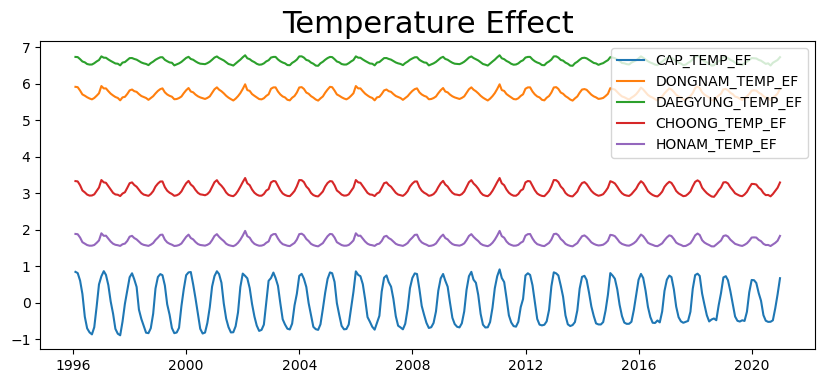

In [55]:
plt.figure(figsize=(10,4))
plt.title('Temperature Effect', size=22)
plt.plot(date, df_sum['CAP_TEMP_EF'], label='CAP_TEMP_EF')
plt.plot(date, df_sum['DONGNAM_TEMP_EF'], label='DONGNAM_TEMP_EF')
plt.plot(date, df_sum['DAEGYUNG_TEMP_EF'], label='DAEGYUNG_TEMP_EF')
plt.plot(date, df_sum['CHOONG_TEMP_EF'], label='CHOONG_TEMP_EF')
plt.plot(date, df_sum['HONAM_TEMP_EF'], label='HONAM_TEMP_EF')
plt.legend()
plt.show()

In [56]:
df_sum['MEAN_TEMP_EF'] = df_sum.iloc[:, 1:].mean(axis=1)

In [57]:
df_sum

,date,CAP_TEMP_EF,DONGNAM_TEMP_EF,DAEGYUNG_TEMP_EF,CHOONG_TEMP_EF,HONAM_TEMP_EF,MEAN_TEMP_EF
0,1996-01,0.84711,5.91778,6.73765,3.33479,1.88651,3.744768
1,1996-02,0.81430,5.90875,6.73291,3.32638,1.87883,3.732234
2,1996-03,0.60731,5.81529,6.67634,3.22000,1.78740,3.621268
3,1996-04,0.24132,5.71003,6.61264,3.07795,1.66054,3.460496
4,1996-05,-0.38328,5.67433,6.58956,3.02586,1.62083,3.305460
...,...,...,...,...,...,...,...
295,2020-08,-0.52038,5.55479,6.50341,2.91789,1.55535,3.202212
296,2020-09,-0.48046,5.62159,6.57738,2.98076,1.59811,3.259476
297,2020-10,-0.14824,5.67245,6.61732,3.06704,1.64228,3.370170
298,2020-11,0.23138,5.73286,6.65465,3.15240,1.70088,3.494434


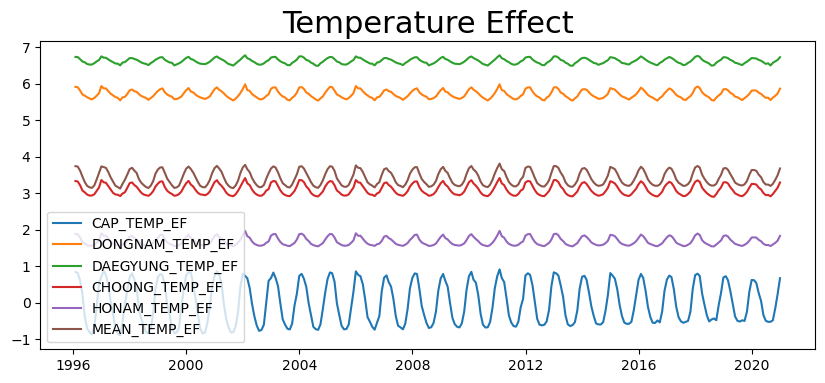

In [58]:
plt.figure(figsize=(10,4))
plt.title('Temperature Effect', size=22)
plt.plot(date, df_sum['CAP_TEMP_EF'], label='CAP_TEMP_EF')
plt.plot(date, df_sum['DONGNAM_TEMP_EF'], label='DONGNAM_TEMP_EF')
plt.plot(date, df_sum['DAEGYUNG_TEMP_EF'], label='DAEGYUNG_TEMP_EF')
plt.plot(date, df_sum['CHOONG_TEMP_EF'], label='CHOONG_TEMP_EF')
plt.plot(date, df_sum['HONAM_TEMP_EF'], label='HONAM_TEMP_EF')
plt.plot(date, df_sum['MEAN_TEMP_EF'], label='MEAN_TEMP_EF')
plt.legend()
plt.show()

In [59]:
df_sum.to_csv('temperature_effect.csv')